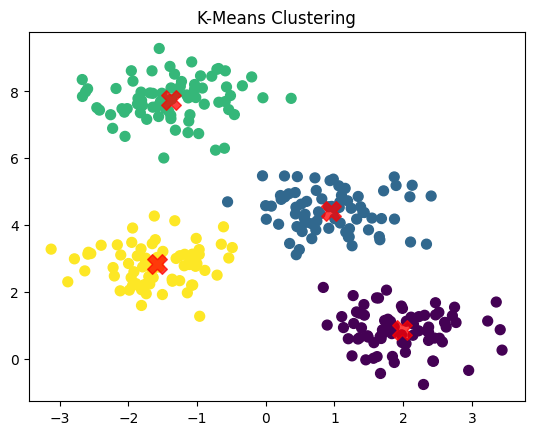

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data
X_blob, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_blob)

# Plot
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.show()

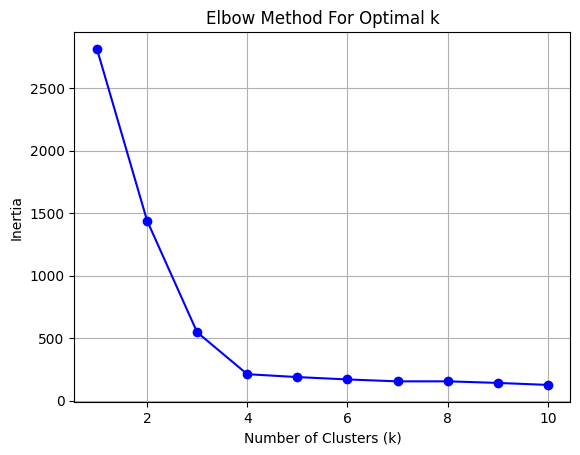

In [6]:
#Elbow Method
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_blob)
    inertias.append(km.inertia_)

# Plot
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

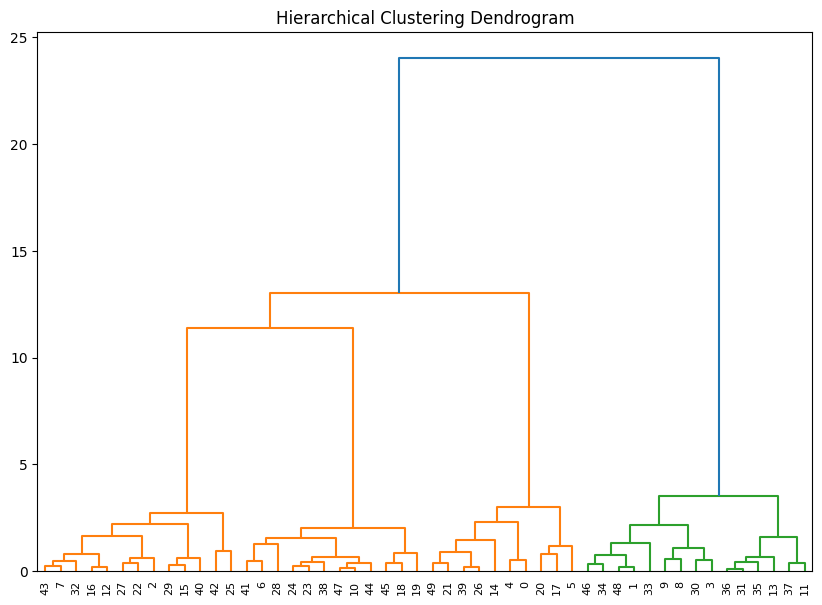

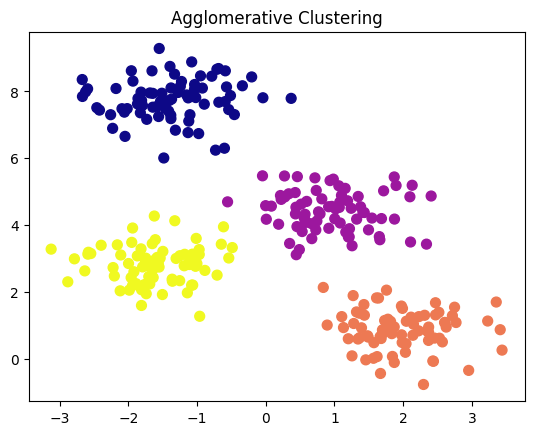

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Linkage matrix
linked = linkage(X_blob[:50], 'ward')  # Use subset for clearer dendrogram

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
y_agg = agg.fit_predict(X_blob)

# Plot clusters
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_agg, cmap='plasma', s=50)
plt.title('Agglomerative Clustering')
plt.show()

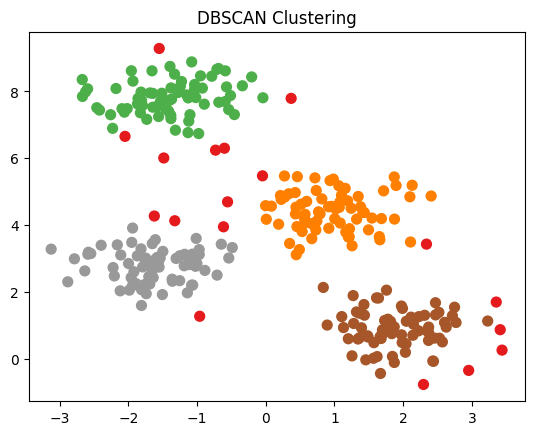

In [8]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_blob)

# Plot
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_dbscan, cmap='Set1', s=50)
plt.title('DBSCAN Clustering')
plt.show()

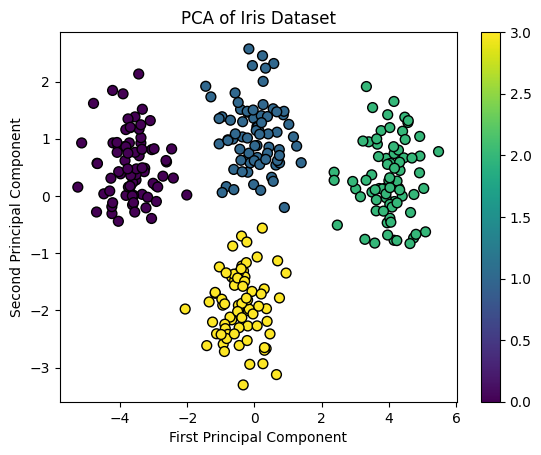

Explained Variance Ratio: [0.82502263 0.17497737]


In [12]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_blob)
# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Iris Dataset')
plt.colorbar()
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

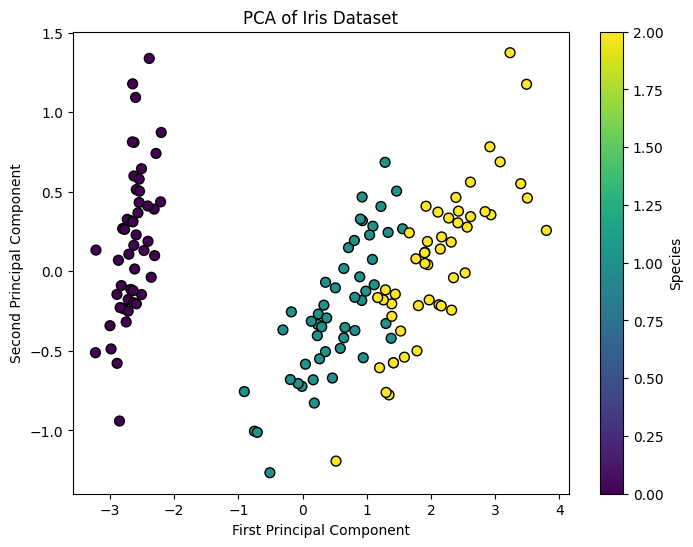

Explained Variance Ratio: [0.92461872 0.05306648]


In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Iris Dataset')
plt.colorbar(scatter, label='Species')
plt.show()

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)